In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 

In [2]:
# 1. Read the CPU data:

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 

In [4]:
# 2. Split the data randomly into a training set and a test set, using a 70/30 split (70% training data).  Use train_test_split.  

In [5]:
train, test = train_test_split(df, test_size=0.3)

In [6]:
# 3. Use LinearRegression to create a linear model to predict performance (feature ‘prp’).  
# Use a couple of predictor variables of your own choice. 
# Create the model using your training set. 

In [7]:
predictors = ['cach', 'cs']
X = df[predictors].values
y = df ['prp'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)

/Users/wicaksamunajat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted vs. actual values')

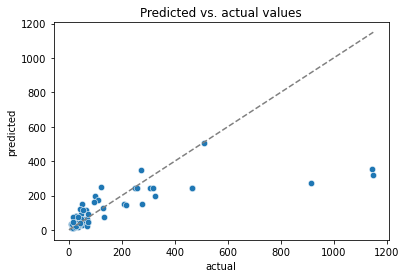

In [9]:
sns.scatterplot(y_test, predicted, s=40)
biggest = np.concatenate([predicted, y_test]).max()
plt.plot([0, biggest], [0, biggest], color='grey', linestyle='dashed')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Predicted vs. actual values')

In [10]:
# 4. Compute the MSE of your model on the test data. 
# Do this manually.

In [11]:
RMSE = np.sqrt(((y_test-predicted)**2).mean())
print('RMSE: {:.2f}'.format(RMSE))

RMSE: 176.54


In [ ]:
# 5. Repeat steps 2-4, but this time use new randomly-generated test and training sets.  
# How much does the RMSE differ? It looks about the same.

/Users/wicaksamunajat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RMSE: 176.54


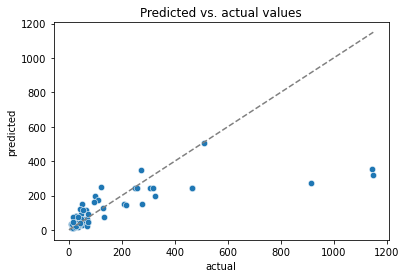

In [12]:
predictors = ['cach','mmin','mmax']
X = df[predictors].values
y = df ['prp'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

predictors = ['cach', 'cs']
X = df[predictors].values
y = df ['prp'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)

sns.scatterplot(y_test, predicted, s=40)
biggest = np.concatenate([predicted, y_test]).max()
plt.plot([0, biggest], [0, biggest], color='grey', linestyle='dashed')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Predicted vs. actual values')

RMSE = np.sqrt(((y_test-predicted)**2).mean())
print('RMSE: {:.2f}'.format(RMSE))